<a href="https://colab.research.google.com/github/torgeirlysen/SuGaR-colab/blob/main/SuGaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SuGaR: Surface-Aligned Gaussian Splatting**

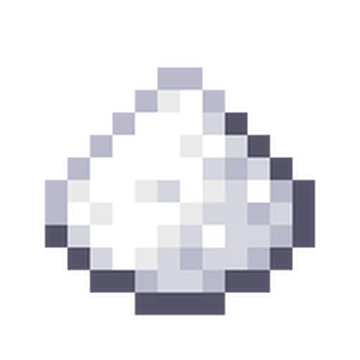

# Introduction
[Original SuGaR repo](https://github.com/Anttwo/SuGaR)

**Explanation of script:** This iPynb can turn a video into a 3D model in .obj format. This works by exporting frames from a video into images with 8-bit color depth, these can then be turned into a Colmap dataset which SuGaR can turn into a mesh.

**On choice of runtime:** The file cannot run on CPU runtime as SuGaR requires Cuda which requires an Nvidida GPU. *A100 GPU* is roughly twice as fast as *T4 GPU* but is also roughly 6 times as expensive per hour. *T4 GPU* may not be able to support SuGaR due to low GPU RAM, therefor it might crash during the final step 😭.

**On execution time of script:** The process is quite slow! Just installing Colmap can take over half an hour, and converting a video to a finished mesh takes an hour or two. This can probably be helped by allowing the script to convert multiple videos which can run i.e overnight.

## Installation
### Install Colmap

In [ ]:
!sudo apt-get install \
    git \
    cmake \
    build-essential \
    libboost-program-options-dev \
    libboost-filesystem-dev \
    libboost-graph-dev \
    libboost-regex-dev \
    libboost-system-dev \
    libboost-test-dev \
    libeigen3-dev \
    libsuitesparse-dev \
    libfreeimage-dev \
    libgoogle-glog-dev \
    libgflags-dev \
    libglew-dev \
    qtbase5-dev \
    libqt5opengl5-dev \
    libcgal-dev \
    libcgal-qt5-dev
!sudo apt-get install libatlas-base-dev libsuitesparse-dev
!git clone https://ceres-solver.googlesource.com/ceres-solver
%cd ceres-solver
!git checkout $(git describe --tags)
%mkdir build
%cd build
!cmake .. -DBUILD_TESTING=OFF -DBUILD_EXAMPLES=OFF
!make
!sudo make install
!sudo apt-get install -y libflann-dev
!sudo apt-get install -y libmetis-dev
!git clone https://github.com/colmap/colmap
%cd colmap
!git checkout dev
%mkdir build
%cd build
!cmake ..
!make
!sudo make install
!CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 cmake ..
%cd ../../../../

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libboost-filesystem-dev is already the newest version (1.74.0.3ubuntu7).
libboost-filesystem-dev set to manually installed.
libboost-program-options-dev is already the newest version (1.74.0.3ubuntu7).
libboost-program-options-dev set to manually installed.
libboost-regex-dev is already the newest version (1.74.0.3ubuntu7).
libboost-regex-dev set to manually installed.
libboost-system-dev is already the newest version (1.74.0.3ubuntu7).
libboost-system-dev set to manually installed.
libboost-graph-dev is already the newest version (1.74.0.3ubuntu7).
libboost-graph-dev set to manually installed.
libboost-test-dev is already the newest version (1.74.0.3ubuntu7).
libboost-test-dev set to manually installed.
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
git is already the newest version (1:2.34.1-1ubuntu1.11).
The fol

### Install SuGaR
Don't restart session when prompted!

In [ ]:
!git clone https://github.com/Anttwo/SuGaR.git --recursive

!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -c conda-forge open3d
!mamba install -c pytorch3d pytorch3d
!pip install -q plyfile
!pip install trimesh
!pip install smplx
!mamba install pytorch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 pytorch-cuda=11.8 -c pytorch -c nvidia
!mamba install -c fvcore -c iopath -c conda-forge fvcore iopath
!mamba install pytorch3d==0.7.4 -c pytorch3d
!mamba install -c plotly plotly
!mamba install -c conda-forge rich
!mamba install -c conda-forge plyfile==0.8.1
!mamba install -c conda-forge jupyterlab
!mamba install -c conda-forge nodejs
!mamba install -c conda-forge ipywidgets
!pip install open3d
!pip install --upgrade PyMCubes

%cd /content/SuGaR
!pip install -e /content/SuGaR/gaussian_splatting/submodules/diff-gaussian-rasterization
!pip install -e /content/SuGaR/gaussian_splatting/submodules/simple-knn

Cloning into 'SuGaR'...
remote: Enumerating objects: 2446, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 2446 (delta 168), reused 166 (delta 166), pack-reused 2229
Receiving objects: 100% (2446/2446), 96.21 MiB | 23.81 MiB/s, done.
Resolving deltas: 100% (1175/1175), done.
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:08
🔁 Restarting kernel...

Looking for: ['open3d']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch     1%[+] 0.2s
conda-forge/linux-64   7%
conda-forge/noarch    46%[+] 0.3s
conda-forge/linux-64  24%
conda-forge/noarch    67%[+] 0.4s
conda-forge/linux-64  33%
conda-forge/noarch   100%conda-forge/noarch                                
[+] 0.5s
conda-forge/linux-64  56%[+] 0.6s


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 5.8 MB/s eta 0:00:00
/content/SuGaR
Obtaining file:///content/SuGaR/gaussian_splatting/submodules/diff-gaussian-rasterization
  Preparing metadata (setup.py) ... done
  Running setup.py develop for diff-gaussian-rasterization
Obtaining file:///content/SuGaR/gaussian_splatting/submodules/simple-knn
  Preparing metadata (setup.py) ... done
  Running setup.py develop for simple-knn


## Generating Mesh from video
### Video to frames

Upload your video by running the cell below

In [ ]:
from google.colab import files

uploaded = files.upload()
video_name = next(iter(uploaded))
video_path = f"/content/{video_name}"


Saving IMG_2532.MOV to IMG_2532.MOV


Convert uploaded video to frames and change color depth.

In [ ]:
output_frames_dir = '/content/frames/'
converted_frames_dir = '/content/converted_frames/input'

!mkdir -p {output_frames_dir}
!mkdir -p {converted_frames_dir}

# Extract frames using FFmpeg
!ffmpeg -i {video_path} -vf "fps=1" {output_frames_dir}/frame_%04d.png

from PIL import Image
import os

# Convert frames to 8-bit color depth
for filename in os.listdir(output_frames_dir):
    if filename.endswith(".png"):
        img_path = os.path.join(output_frames_dir, filename)
        img = Image.open(img_path)
        img = img.convert("RGB")  # Ensure image is in RGB format
        img = img.quantize(colors=256, method=0, kmeans=0, palette=None)  # Convert to 8-bit color depth
        img.save(os.path.join(converted_frames_dir, filename))

print("Conversion to 8-bit color depth complete!")

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-10)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1718838163959/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1718838163959/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1718838163959/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1718838163959/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1718838163959/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-lib

### Training SuGaR model and creating mesh
This takes approximately 20 years to run 💀🙃🐌

In [ ]:
%cd SuGaR

# Creating Colmap dataset
!python gaussian_splatting/convert.py -s ../converted_frames

# Training SuGaR model
!python gaussian_splatting/train.py -s ../converted_frames/ --iterations 7000 -m output

# Creating refined mesh
# --refinement_time can be long or short, short is best when testing
!python train.py -s ../converted_frames/ -c output/ -r density --eval True --low_poly False --high_poly True --refinement_time short --export_uv_textured_mesh True --export_ply True

%cd ../

I0712 19:28:14.836377 26443 misc.cc:198] 
Feature extraction
I0712 19:28:14.839162 26452 sift.cc:716] Creating SIFT GPU feature extractor
I0712 19:28:15.176602 26453 feature_extraction.cc:257] Processed file [1/60]
I0712 19:28:15.176641 26453 feature_extraction.cc:260]   Name:            frame_0001.png
I0712 19:28:15.176647 26453 feature_extraction.cc:286]   Dimensions:      1080 x 1920
I0712 19:28:15.176652 26453 feature_extraction.cc:289]   Camera:          #1 - OPENCV
I0712 19:28:15.176662 26453 feature_extraction.cc:292]   Focal Length:    2304.00px
I0712 19:28:15.176679 26453 feature_extraction.cc:296]   Features:        13569
I0712 19:28:15.246167 26453 feature_extraction.cc:257] Processed file [2/60]
I0712 19:28:15.246212 26453 feature_extraction.cc:260]   Name:            frame_0002.png
I0712 19:28:15.246218 26453 feature_extraction.cc:286]   Dimensions:      1080 x 1920
I0712 19:28:15.246223 26453 feature_extraction.cc:289]   Camera:          #1 - OPENCV
I0712 19:28:15.246228 

### Zipping output and downloading

In [ ]:
%cd SuGaR/output/
!zip -r ../../mesh.zip refined_mesh/
%cd ../../

from google.colab import files
files.download('/content/mesh.zip')

/content/SuGaR/output
  adding: refined_mesh/ (stored 0%)
  adding: refined_mesh/converted_frames/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content
